In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# %matplotlib notebook

# Другая задача Коши

In [3]:
h = 0.1
X = 1
x_0 = 0
y_0 = 0

N = int((X - x_0)/h) # 10 

def f(y,x):
    return (y+x)**2

def Y(x):
    return (np.sin(x)/np.cos(x)-x)

In [4]:
Y(0)

0.0

In [5]:
E = np.zeros((2,4))

In [6]:
x = np.array([int((x_0 + i*h)*10)/10 for i in range(N+1)])
y_1 = np.zeros(N+1) # для Эйлера
y_1[0] = y_0
y_2 = np.zeros(N+1) # для Рунге-Курта 3-го порядка (не то, что на доске, а тот, что на лекции)
y_2[0] = y_0
y_3 = np.zeros(N+1) # для Рунге-Курта 3-го порядка
y_3[0] = y_0
y_4 = np.zeros(N+1) # для Рунге-Курта 4-го порядка
y_4[0] = y_0

In [7]:
x, y_1

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [8]:
k = np.zeros((4,N + 1))

In [9]:
for i in range(N): 
    k[0,i] = h*f(y_1[i],x[i])
    y_1[i+1] = y_1[i] + k[0,i]

In [10]:
y_1

array([0.        , 0.        , 0.001     , 0.0050401 , 0.01434505,
       0.03151323, 0.05976386, 0.10329269, 0.16782061, 0.26148828,
       0.39639379])

In [11]:
m = 0
s = 0
for i in range(N + 1):
    temp = abs(y_1[i] - Y(x[i]))
    if temp > m: m = temp
    s = s + abs(y_1[i] - Y(x[i]))

E[0,0] = m
E[1,0] = np.sqrt(s)

In [12]:
E

array([[0.16101394, 0.        , 0.        , 0.        ],
       [0.64377694, 0.        , 0.        , 0.        ]])

In [13]:
for i in range(N): 
    k[0,i] = h*f(y_2[i], x[i])
    k[1,i] = h*f(y_2[i]+k[0,i]/3, x[i]+h/3)
    k[2,i] = h*f(y_2[i]+2*k[1,i]/3, x[i]+2*h/3)
    dy = (k[0,i] + 2*k[1,i] + k[2,i])/4
    y_2[i+1] = y_2[i] + dy

In [14]:
for i in range(N): 
    k[0,i] = h*f(y_3[i], x[i])
    k[1,i] = h*f(y_3[i]+k[0,i]/3, x[i]+h/3)
    k[2,i] = h*f(y_3[i]+2*k[1,i]/3, x[i]+2*h/3)
    dy = (k[0,i] + 3*k[2,i])/4
    y_3[i+1] = y_3[i] + dy

In [15]:
y_2, y_3

(array([0.00000000e+00, 1.66913717e-04, 2.01916791e-03, 7.69644623e-03,
        1.96396441e-02, 4.08274752e-02, 7.51169799e-02, 1.27775868e-01,
        2.06372687e-01, 3.22363273e-01, 4.94120232e-01]),
 array([0.00000000e+00, 3.34074486e-04, 2.70753668e-03, 9.32986833e-03,
        2.27795111e-02, 4.62751008e-02, 8.40835410e-02, 1.42184847e-01,
        2.29433419e-01, 3.59735879e-01, 5.56483487e-01]))

In [16]:
m = 0
s = 0
for i in range(N + 1):
    temp = abs(y_2[i] - Y(x[i]))
    if temp > m: m = temp
    s = s + abs(y_2[i] - Y(x[i]))

E[0,1] = m
E[1,1] = np.sqrt(s)

In [17]:
m = 0
s = 0
for i in range(N + 1):
    temp = abs(y_3[i] - Y(x[i]))
    if temp > m: m = temp
    s = s + abs(y_3[i] - Y(x[i]))

E[0,2] = m
E[1,2] = np.sqrt(s)

In [18]:
for i in range(N): 
    k[0,i] = h*f(y_4[i], x[i])
    k[1,i] = h*f(y_4[i]+k[0,i]/2, x[i]+h/2)
    k[2,i] = h*f(y_4[i]+k[1,i]/2, x[i]+h/2)
    k[3,i] = h*f(y_4[i]+k[2,i], x[i]+h)
    dy = (k[0,i] + 2*k[1,i] + 2*k[2,i] + k[3,i])/6
    y_4[i+1] = y_4[i] + dy

In [19]:
y_4

array([0.00000000e+00, 3.34589078e-04, 2.70987823e-03, 9.33603934e-03,
       2.27929929e-02, 4.63023076e-02, 8.41367567e-02, 1.42288569e-01,
       2.29639061e-01, 3.60158783e-01, 5.57406443e-01])

In [20]:
m = 0
s = 0
for i in range(N + 1):
    temp = abs(y_4[i] - Y(x[i]))
    if temp > m: m = temp
    s = s + abs(y_4[i] - Y(x[i]))

E[0,3] = m
E[1,3] = np.sqrt(s)

In [21]:
E

array([[1.61013939e-01, 6.32874928e-02, 9.24237772e-04, 1.28180991e-06],
       [6.43776940e-01, 3.98757654e-01, 4.19415108e-02, 1.85753330e-03]])

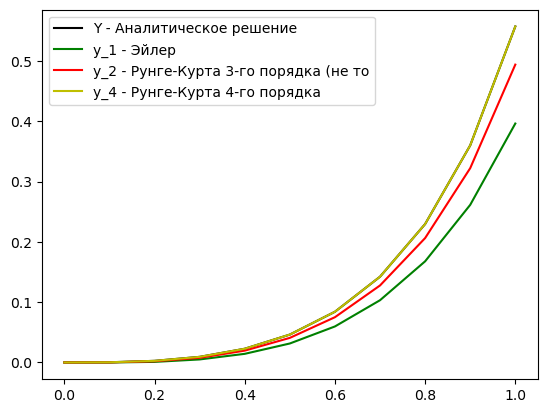

In [22]:
t = np.linspace(x_0, X, N+1)

plt.plot(t, Y(t), color = 'black', label = 'Y - Аналитическое решение')
plt.plot(t, y_1, color = 'g', label = 'y_1 - Эйлер')
plt.plot(t, y_2, color = 'r', label = 'y_2 - Рунге-Курта 3-го порядка (не то')
#plt.plot(t, y_3, color = 'b', label = 'y_3 - Рунге-Курта 3-го порядка')
plt.plot(t, y_4, color = 'y', label = 'y_4 - Рунге-Курта 4-го порядка')
plt.legend()
plt.show()

# Теперь для 2N

In [23]:
h2 = 0.05
X = 1
x_0 = 0
y_0 = 0

N2 = int((X - x_0)/h2) # 20 

def f(y,x):
    return (y+x)**2

def Y(x):
    return (np.sin(x)/np.cos(x)-x)
    
E2 = np.zeros((2,4))

x2 = np.array([(x_0 + i*h2) for i in range(N2+1)])
y2_1 = np.zeros(N2+1) # для Эйлера
y2_1[0] = y_0
y2_2 = np.zeros(N2+1) # для Рунге-Курта 3-го порядка (не то, что на доске, а тот, что на лекции)
y2_2[0] = y_0
y2_3 = np.zeros(N2+1) # для Рунге-Курта 3-го порядка
y2_3[0] = y_0
y2_4 = np.zeros(N2+1) # для Рунге-Курта 4-го порядка
y2_4[0] = y_0

k2 = np.zeros((4,N2 + 1))

for i in range(N2): 
    k2[0,i] = h*f(y2_1[i],x2[i])
    y2_1[i+1] = y2_1[i] + k2[0,i]

m = 0
s = 0
for i in range(N2 + 1):
    temp = abs(y2_1[i] - Y(x2[i]))
    if temp > m: m = temp
    s = s + abs(y2_1[i] - Y(x2[i]))

E2[0,0] = m
E2[1,0] = np.sqrt(s)

for i in range(N2): 
    k2[0,i] = h2*f(y2_2[i], x2[i])
    k2[1,i] = h2*f(y2_2[i]+k2[0,i]/3, x2[i]+h2/3)
    k2[2,i] = h2*f(y2_2[i]+2*k2[1,i]/3, x2[i]+2*h2/3)
    dy2 = (k2[0,i] + 2*k2[1,i] + k2[2,i])/4
    y2_2[i+1] = y2_2[i] + dy2

for i in range(N2): 
    k2[0,i] = h2*f(y2_3[i], x2[i])
    k2[1,i] = h2*f(y2_3[i]+k2[0,i]/3, x2[i]+h2/3)
    k2[2,i] = h2*f(y2_3[i]+2*k2[1,i]/3, x2[i]+2*h2/3)
    dy2 = (k2[0,i] + 3*k2[2,i])/4
    y2_3[i+1] = y2_3[i] + dy2

for i in range(N2): 
    k2[0,i] = h2*f(y2_4[i], x2[i])
    k2[1,i] = h2*f(y2_4[i]+k2[0,i]/2, x2[i]+h2/2)
    k2[2,i] = h2*f(y2_4[i]+k2[1,i]/2, x2[i]+h2/2)
    k2[3,i] = h2*f(y2_4[i]+k2[2,i], x2[i]+h2)
    dy2 = (k2[0,i] + 2*k2[1,i] + 2*k2[2,i] + k2[3,i])/6
    y2_4[i+1] = y2_4[i] + dy2

m = 0
s = 0
for i in range(N2 + 1):
    temp = abs(y2_2[i] - Y(x2[i]))
    if temp > m: m = temp
    s = s + abs(y2_2[i] - Y(x2[i]))

E2[0,1] = m
E2[1,1] = np.sqrt(s)

m = 0
s = 0
for i in range(N2 + 1):
    temp = abs(y2_3[i] - Y(x2[i]))
    if temp > m: m = temp
    s = s + abs(y2_3[i] - Y(x2[i]))

E2[0,2] = m
E2[1,2] = np.sqrt(s)

m = 0
s = 0
for i in range(N2 + 1):
    temp = abs(y2_4[i] - Y(x2[i]))
    if temp > m: m = temp
    s = s + abs(y2_4[i] - Y(x2[i]))

E2[0,3] = m
E2[1,3] = np.sqrt(s)

In [24]:
E, E2

(array([[1.61013939e-01, 6.32874928e-02, 9.24237772e-04, 1.28180991e-06],
        [6.43776940e-01, 3.98757654e-01, 4.19415108e-02, 1.85753330e-03]]),
 array([[1.22093507e+00, 3.32785792e-02, 1.28806167e-04, 8.95680182e-08],
        [2.01103507e+00, 3.82543166e-01, 2.01315235e-02, 7.21843217e-04]]))

In [25]:
P = np.zeros((2,4))
for i in range(2):
    for j in range(4):
        P[i,j] = np.log2(E[i,j]/E2[i,j])

In [26]:
P

array([[-2.92272898,  0.92732657,  2.84306239,  3.83905483],
       [-1.64330543,  0.05988966,  1.05892248,  1.36363065]])